# Notebook to check HTO counts for few single nuclei across models of cellbender

**Created by :** Srivalli Kolla

**Created on :** 06 March, 2025

**Modified on :** 06 March, 2025

**University of Würzburg**

Env : scanpy (Python 3.12.2)

# Importing Packages

In [70]:
import scanpy as sc
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [71]:
sc.settings.verbosity = 3
sc.logging.print_versions()

plt.rcParams['figure.dpi'] = 300  
plt.rcParams['savefig.dpi'] = 300

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython              3.0.12
PIL                 11.1.0
asttokens           NA
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython              3.0.12
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.12
decorator           5.2.1
executing           2.1.0
h5py                3.13.0
ipykernel           6.29.5
jedi                0.19.2
joblib              1.4.2
kiwisolver          1.4.7
legacy_api_wrap     NA
llvmlite            0.44.0
matplotlib          3.10.1
matplotlib_inline   0.1.7
mpl_toolkits        NA
natsort             8.4.0
numba               0.61.0
numpy               2.1.3
packaging           24.2
pandas              2.2.3
parso               0.8.4
patsy               1.0.1
platformdirs        4.3.6
prompt_toolkit      3.0.50
psutil              7.0.0
pure_eval           0.2.3
pydev_ipython       NA
pydevconsole        NA
pydevd              3.2.3
pydevd_file_uti

# File Check

In [72]:
raw_data_path = "../data/before_cb_raw_with_hashtags_06_03_25.h5ad"
raw_adata = sc.read_h5ad(raw_data_path)

model_paths = {
    "0.01": "../data/cellbender_processed_data/0.01_full/cb_0.01_full_with_hashtags_05_03_25.h5ad",
    "0.03": "../data/cellbender_processed_data/0.03_full/cb_0.03_full_with_hashtags_05_03_25.h5ad",
    "0.05": "../data/cellbender_processed_data/0.05_full/cb_0.05_full_with_hashtags_05_03_25.h5ad",
    "0.07": "../data/cellbender_processed_data/0.07_full/cb_0.07_full_with_hashtags_05_03_25.h5ad",
    "0.1": "../data/cellbender_processed_data/0.1_full/cb_0.1_full_with_hashtags_05_03_25.h5ad"
}

# Features check

In [73]:
hto_features = [f for f in raw_adata.var_names if "Totalseq" in f or raw_adata.var.loc[f, "feature_types"] == "Antibody Capture"]

# Get the raw data as a DataFrame
raw_df = pd.DataFrame(raw_adata.X.toarray(), index=raw_adata.obs.index, columns=raw_adata.var_names)

# Keep only HTO features
raw_df = raw_df[hto_features]

# Print first few rows of raw data
print("Raw Data Head:")
print(raw_df.head())

hto_counts_list = []
hto_counts_list

Raw Data Head:
                    TotalSeqB1  TotalSeqB3  TotalSeqB4  TotalSeqB5  \
AAACCAAAGCCAGTGT-1       168.0       422.0       401.0       115.0   
AAACCAAAGGCGTCCA-1       196.0       486.0       238.0       145.0   
AAACCAAAGGTTAGCC-1       185.0       615.0       113.0       158.0   
AAACCAAAGGTTAGTT-1       153.0       415.0        95.0       248.0   
AAACCAAAGTACCACA-1       181.0       433.0        89.0       132.0   

                    TotalSeqB6  TotalSeqB7  TotalSeqB8  TotalSeqB9  
AAACCAAAGCCAGTGT-1       181.0       124.0       214.0       335.0  
AAACCAAAGGCGTCCA-1       210.0       155.0       255.0       243.0  
AAACCAAAGGTTAGCC-1       236.0       122.0       243.0       189.0  
AAACCAAAGGTTAGTT-1       221.0       128.0       211.0       187.0  
AAACCAAAGTACCACA-1       207.0       175.0       231.0       207.0  


[]

# HTO count check

1. Load filtered HTO data for each model
2. Calculate HTO counts for each Hashtag
3. Create a DataFrame to compare raw and filtered counts
4. Append the comparison for this model to the list
5. Combine all models' comparison data into a single DataFrame
6. Melt the data for plotting

In [74]:
for model, path in model_paths.items():
    print(f"Processing {model} model...")

    adata = sc.read_h5ad(path)
    filtered_df = pd.DataFrame(adata.X.toarray(), index=adata.obs.index, columns=adata.var_names)[hto_features]

    raw_counts = raw_df.sum(axis=0)
    filtered_counts = filtered_df.sum(axis=0)


    comparison_df = pd.DataFrame({
        'Hashtag': raw_counts.index,
        'Raw Count': raw_counts.values,
        'Filtered Count': filtered_counts.values,
        'Model': model
    })

    # 
    hto_counts_list.append(comparison_df)

hto_counts_combined = pd.concat(hto_counts_list)
hto_counts_long = hto_counts_combined.melt(id_vars=['Hashtag', 'Model'], 
                                           value_vars=['Raw Count', 'Filtered Count'],
                                           var_name='Count Type', 
                                           value_name='HTO Count')

Processing 0.01 model...
Processing 0.03 model...
Processing 0.05 model...
Processing 0.07 model...
Processing 0.1 model...


# Figures

1. Filter data for the current Hashtag
2. Create a barplot and addd titles, legeneds

/tmp/ipykernel_228169/2534610132.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Model', y='HTO Count', hue='Count Type', data=hashtag_data, palette='Set1', ci=None)


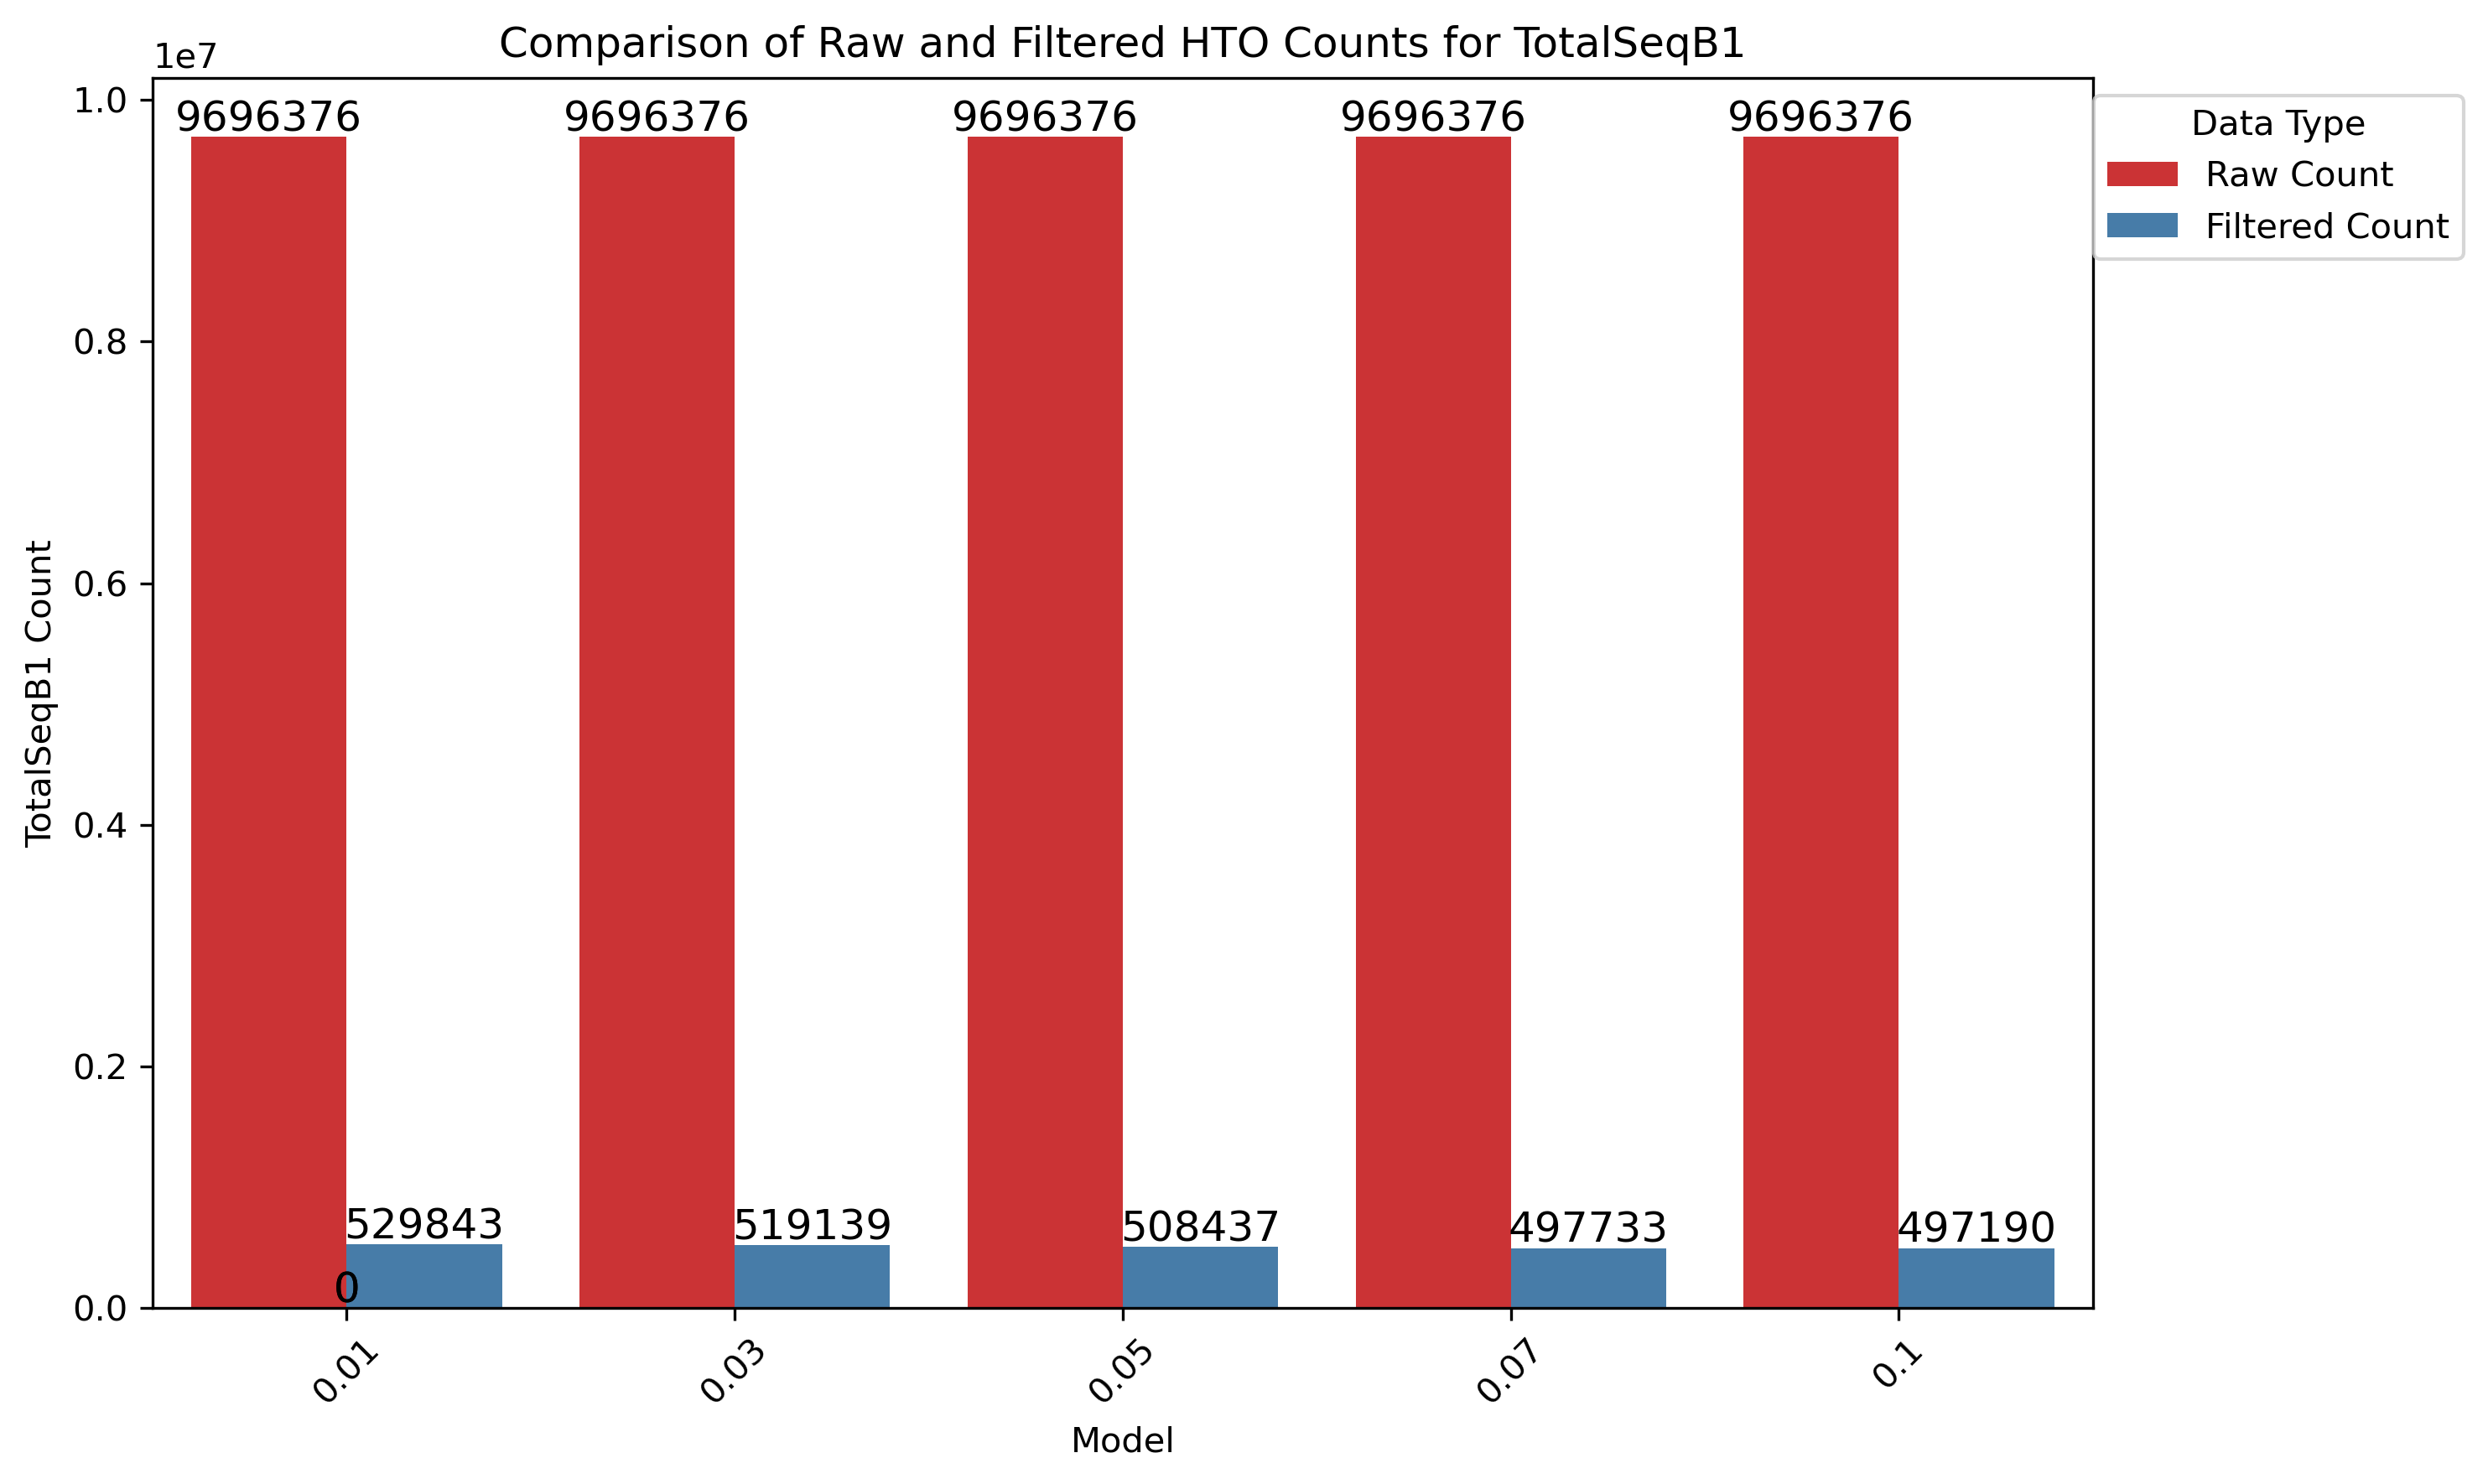

/tmp/ipykernel_228169/2534610132.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Model', y='HTO Count', hue='Count Type', data=hashtag_data, palette='Set1', ci=None)


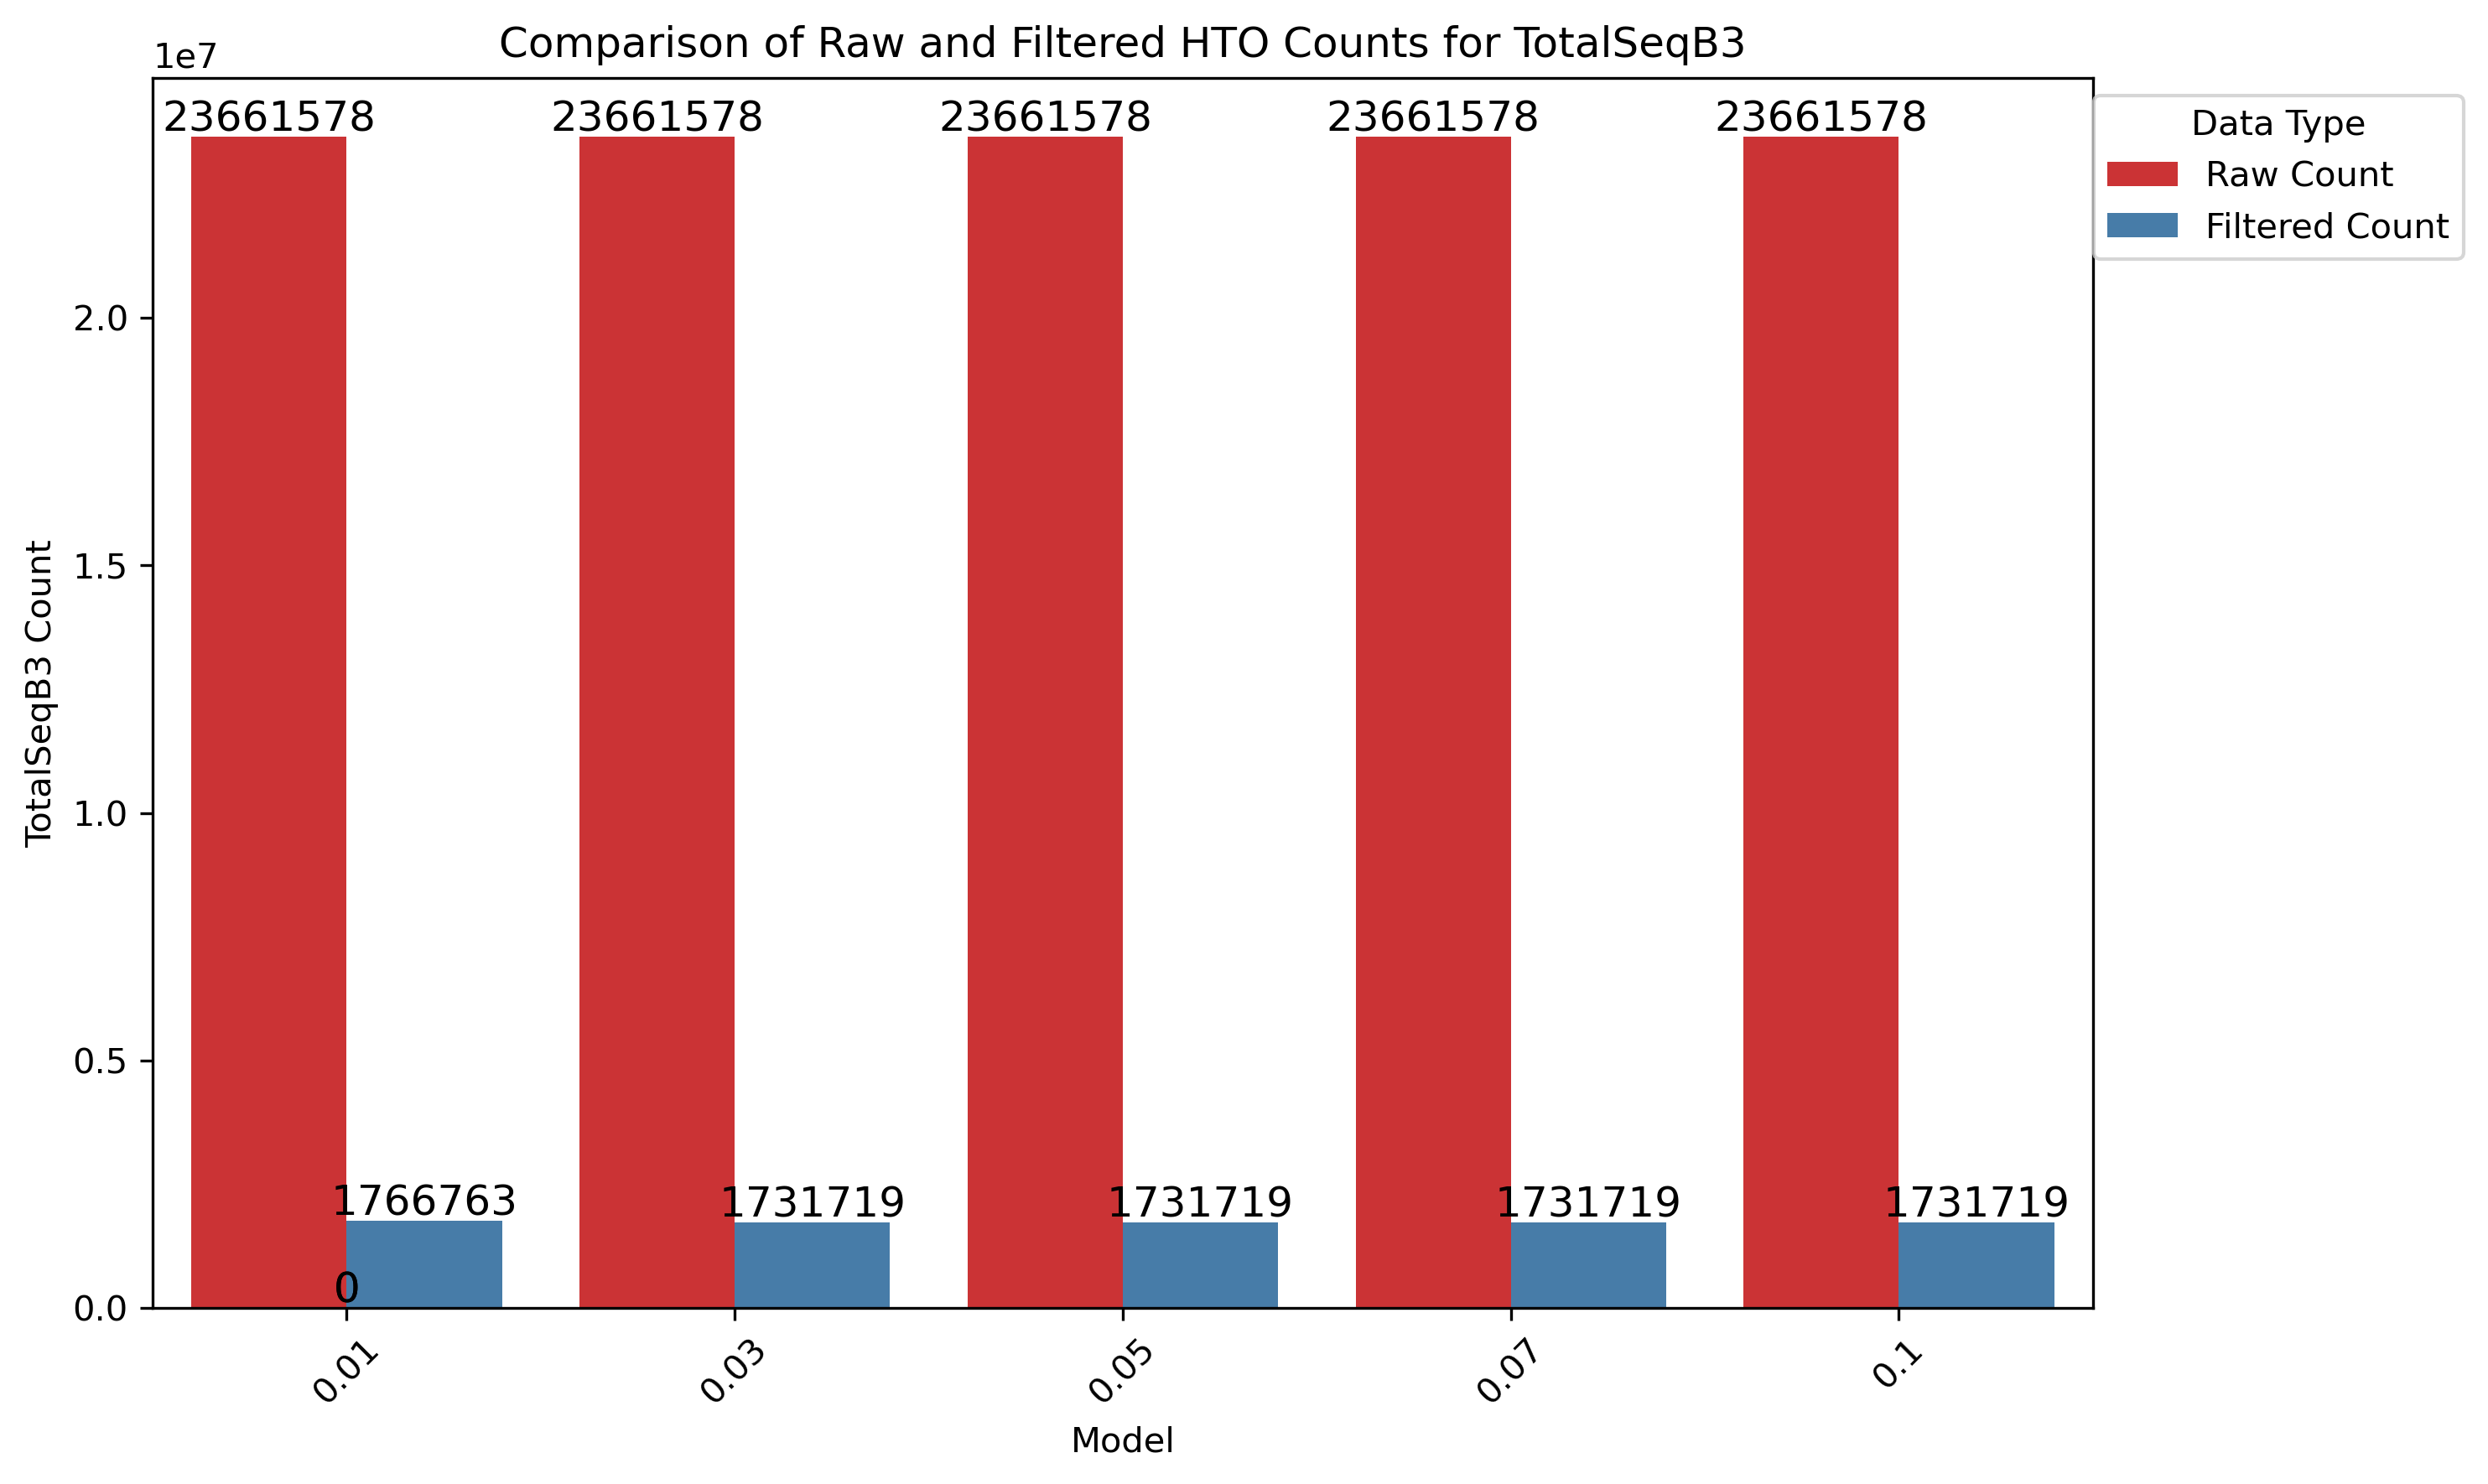

/tmp/ipykernel_228169/2534610132.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Model', y='HTO Count', hue='Count Type', data=hashtag_data, palette='Set1', ci=None)


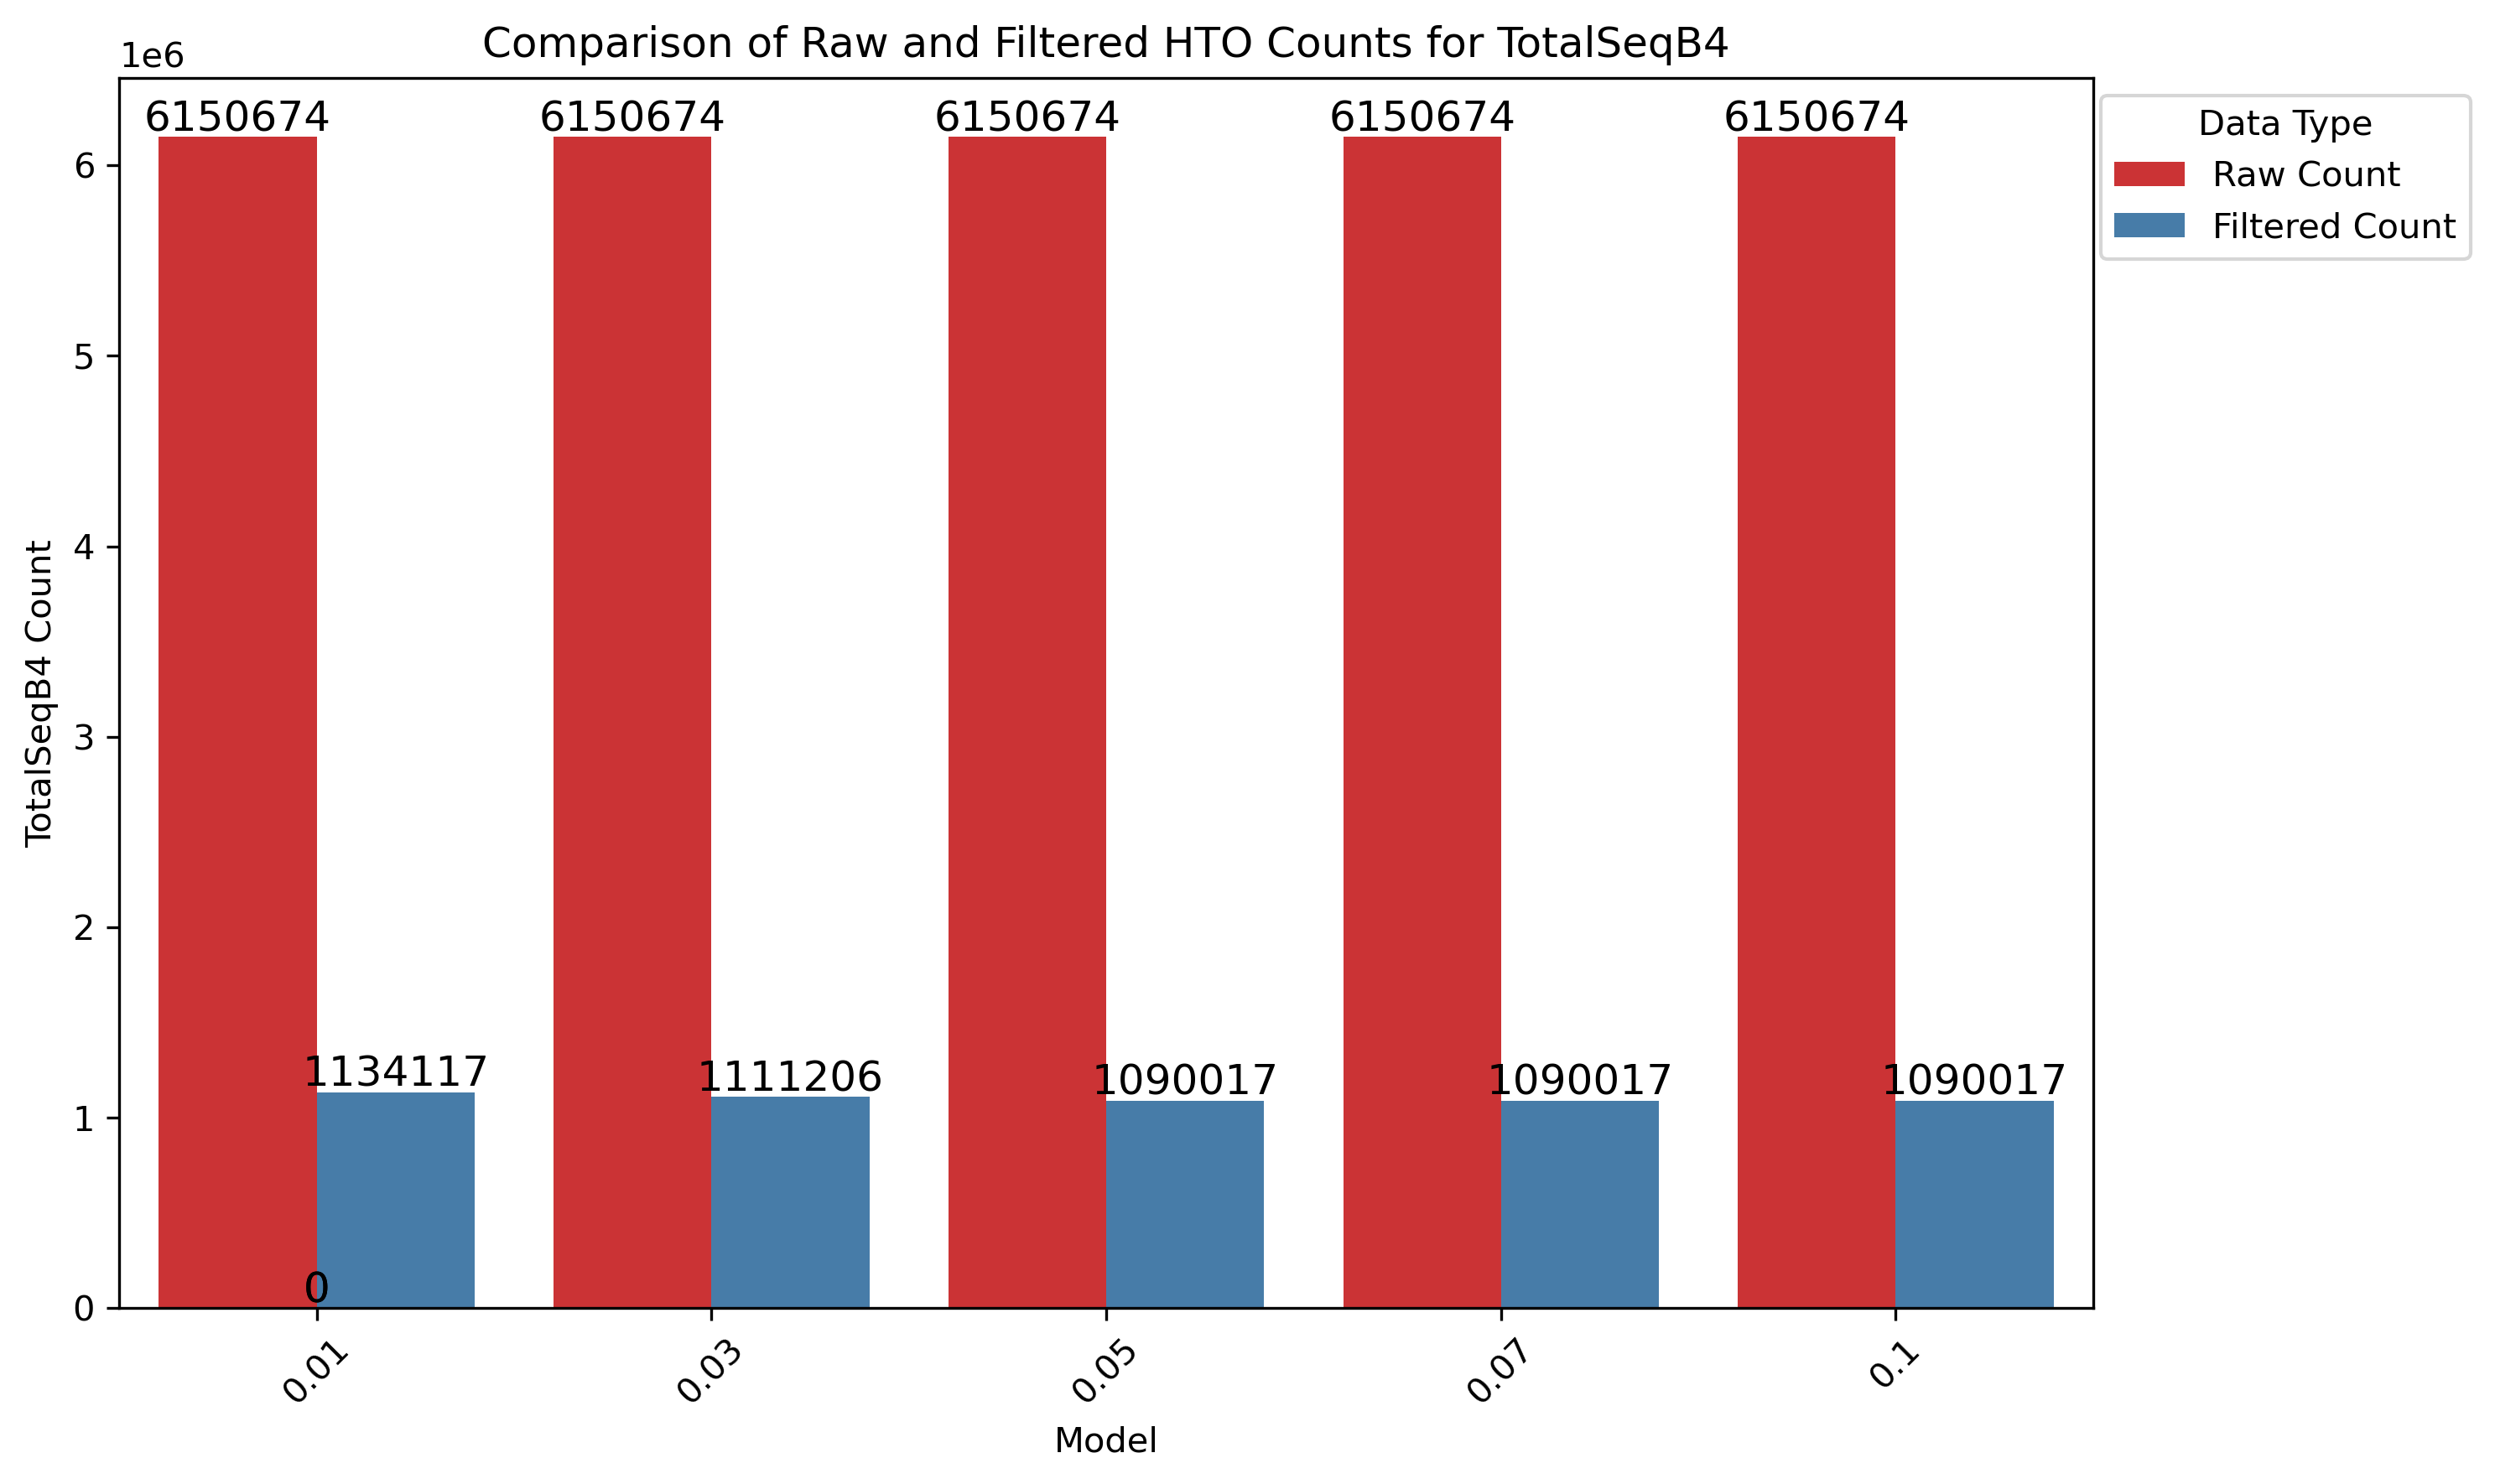

/tmp/ipykernel_228169/2534610132.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Model', y='HTO Count', hue='Count Type', data=hashtag_data, palette='Set1', ci=None)


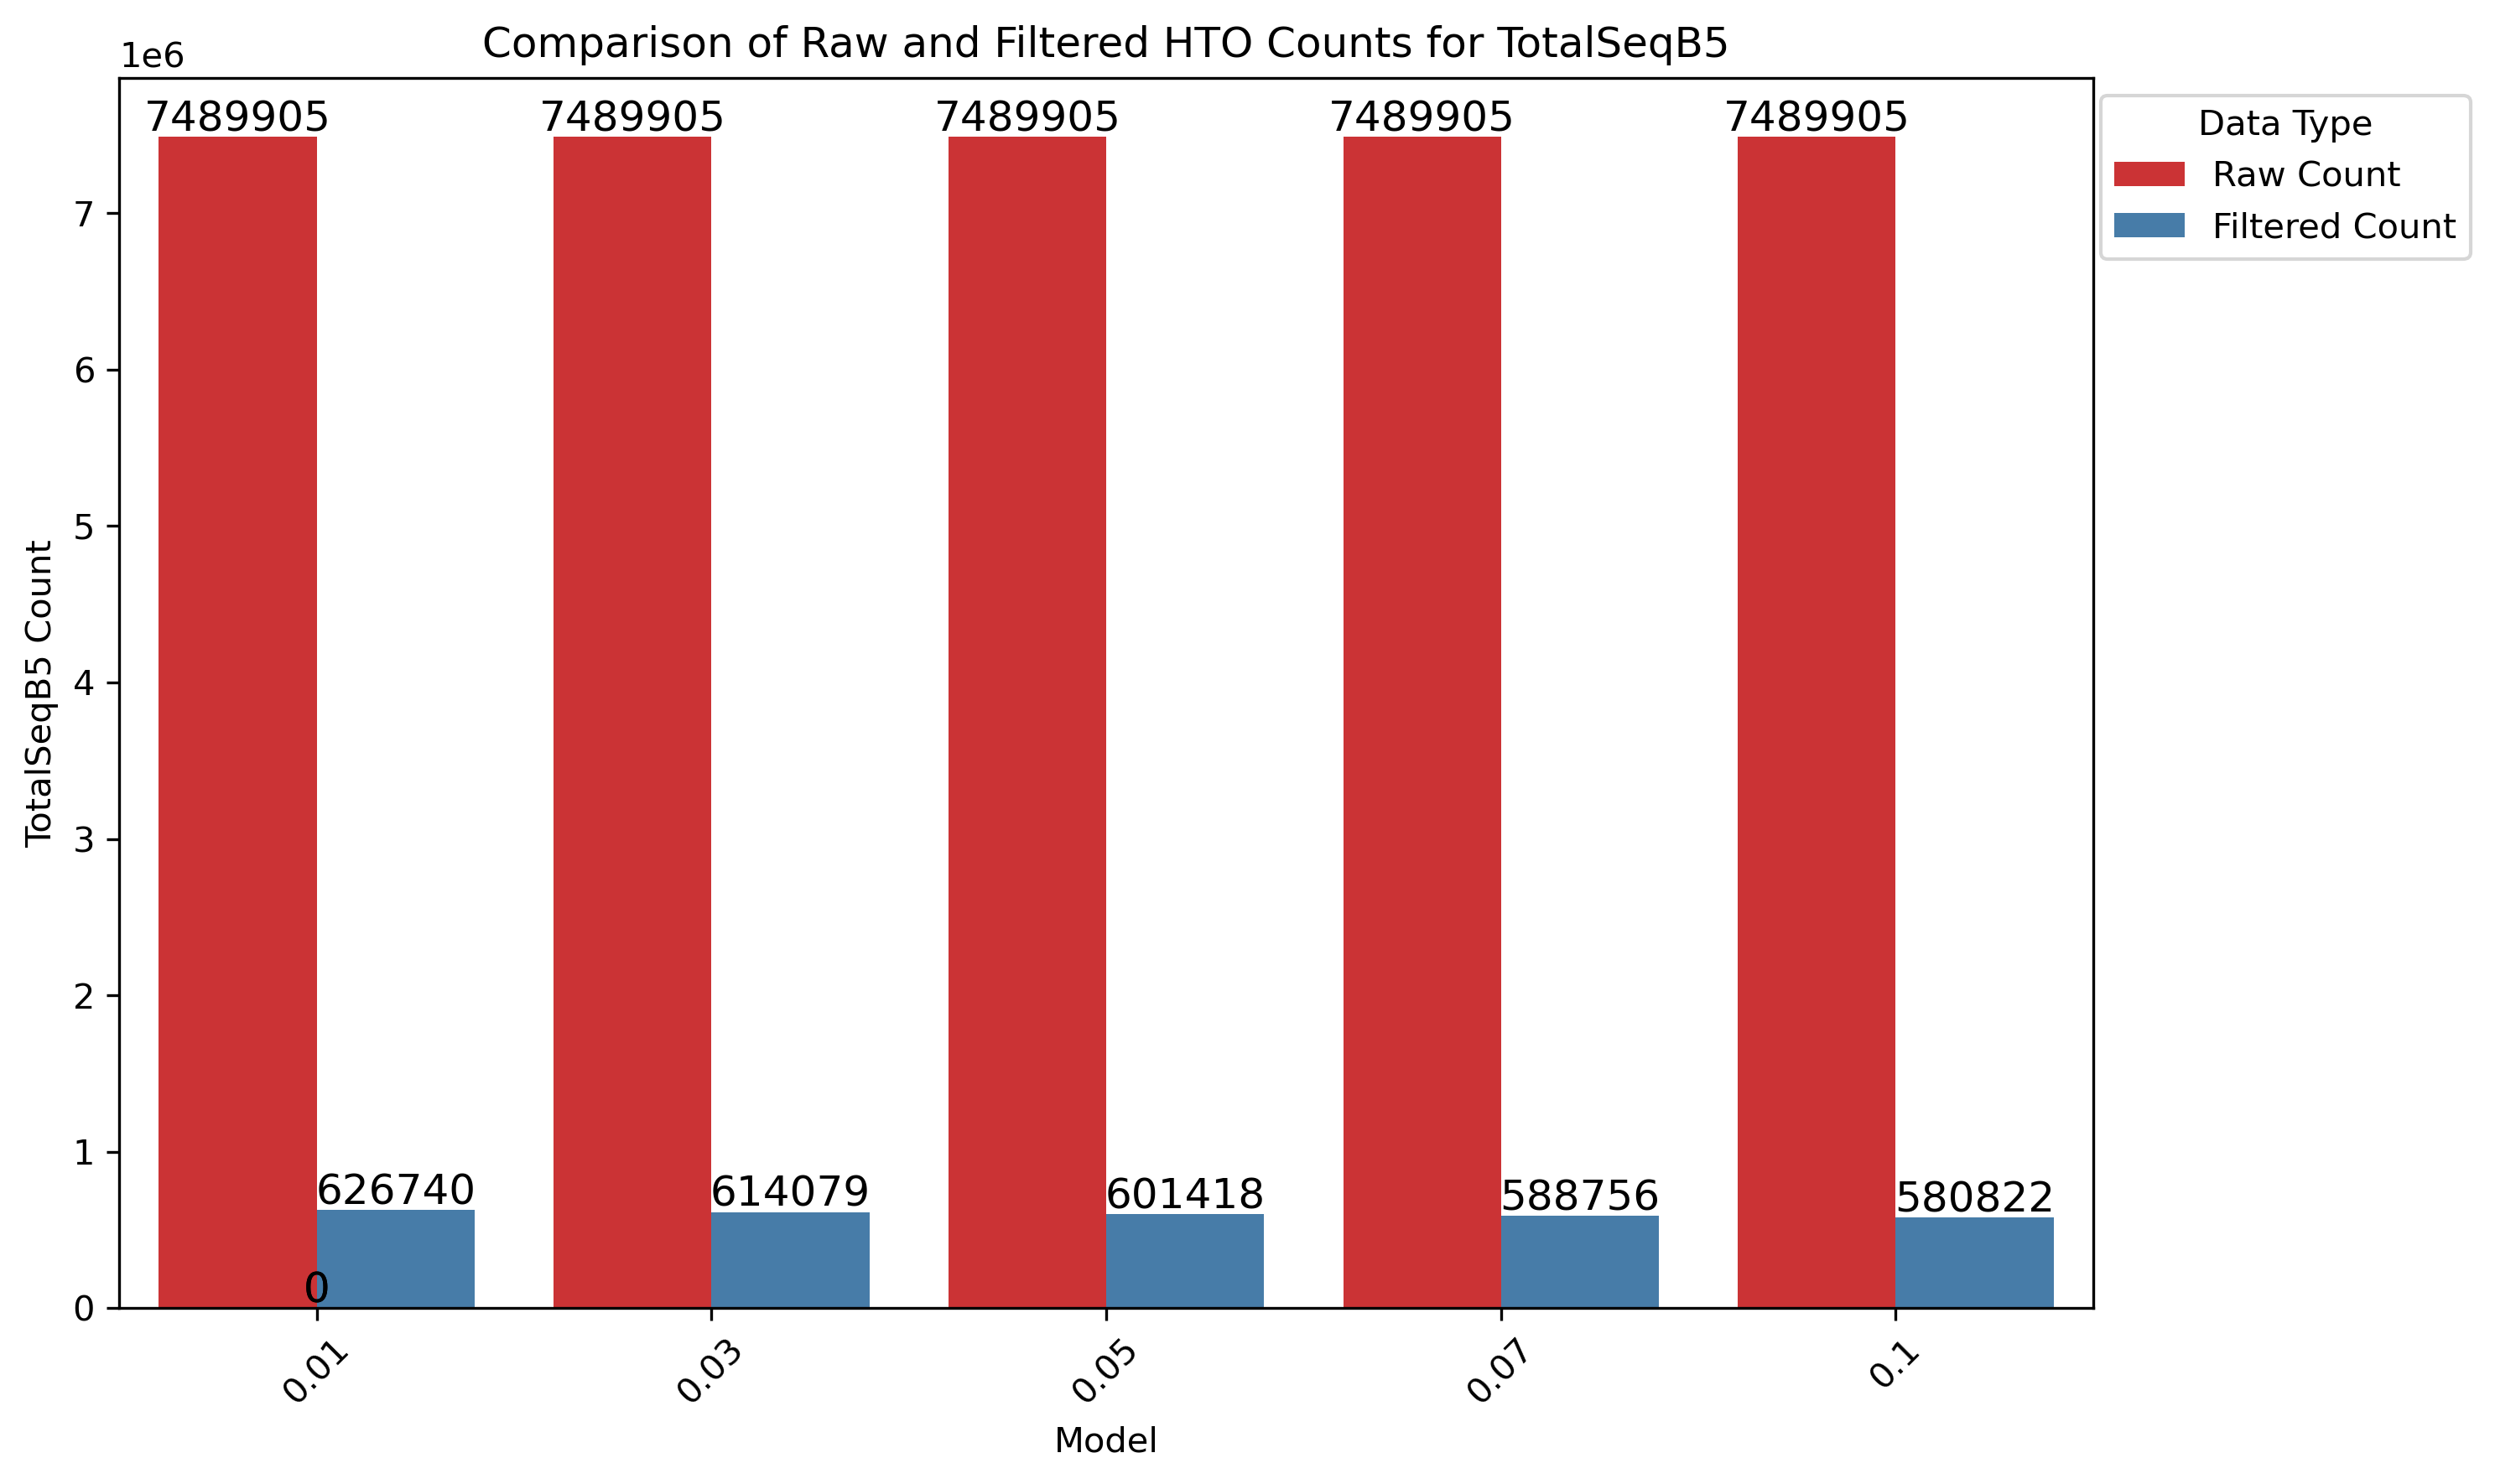

/tmp/ipykernel_228169/2534610132.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Model', y='HTO Count', hue='Count Type', data=hashtag_data, palette='Set1', ci=None)


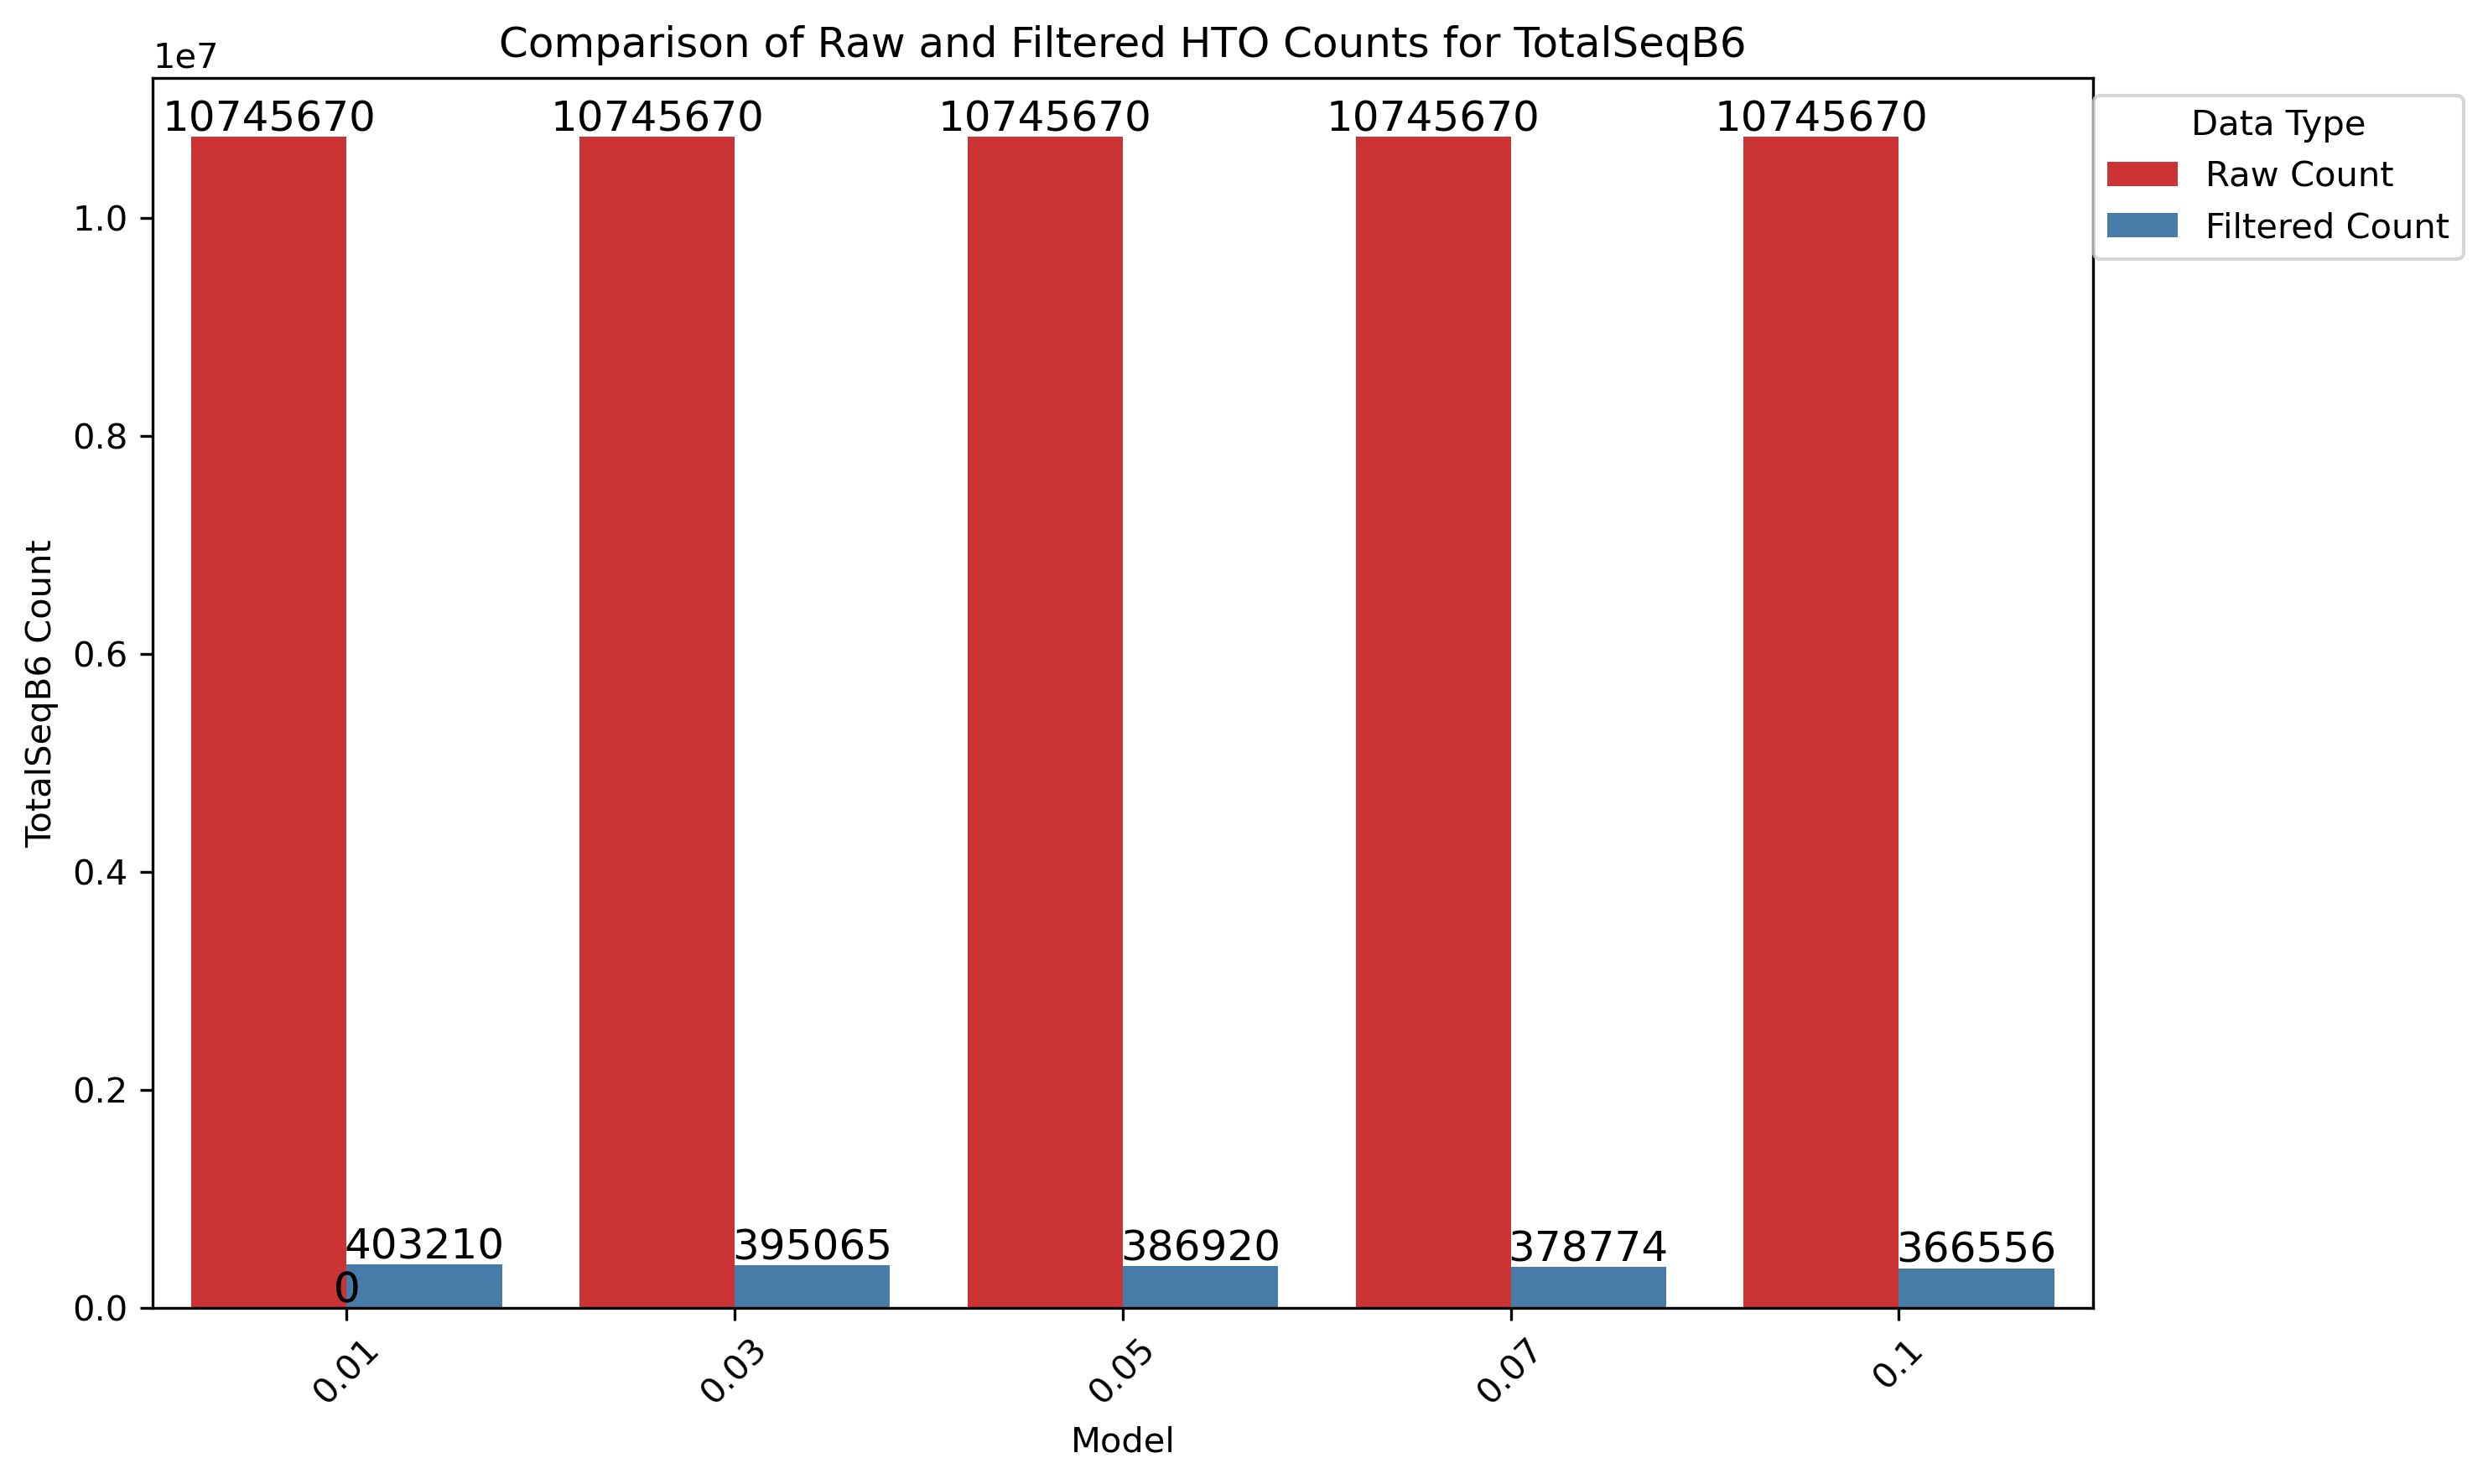

/tmp/ipykernel_228169/2534610132.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Model', y='HTO Count', hue='Count Type', data=hashtag_data, palette='Set1', ci=None)


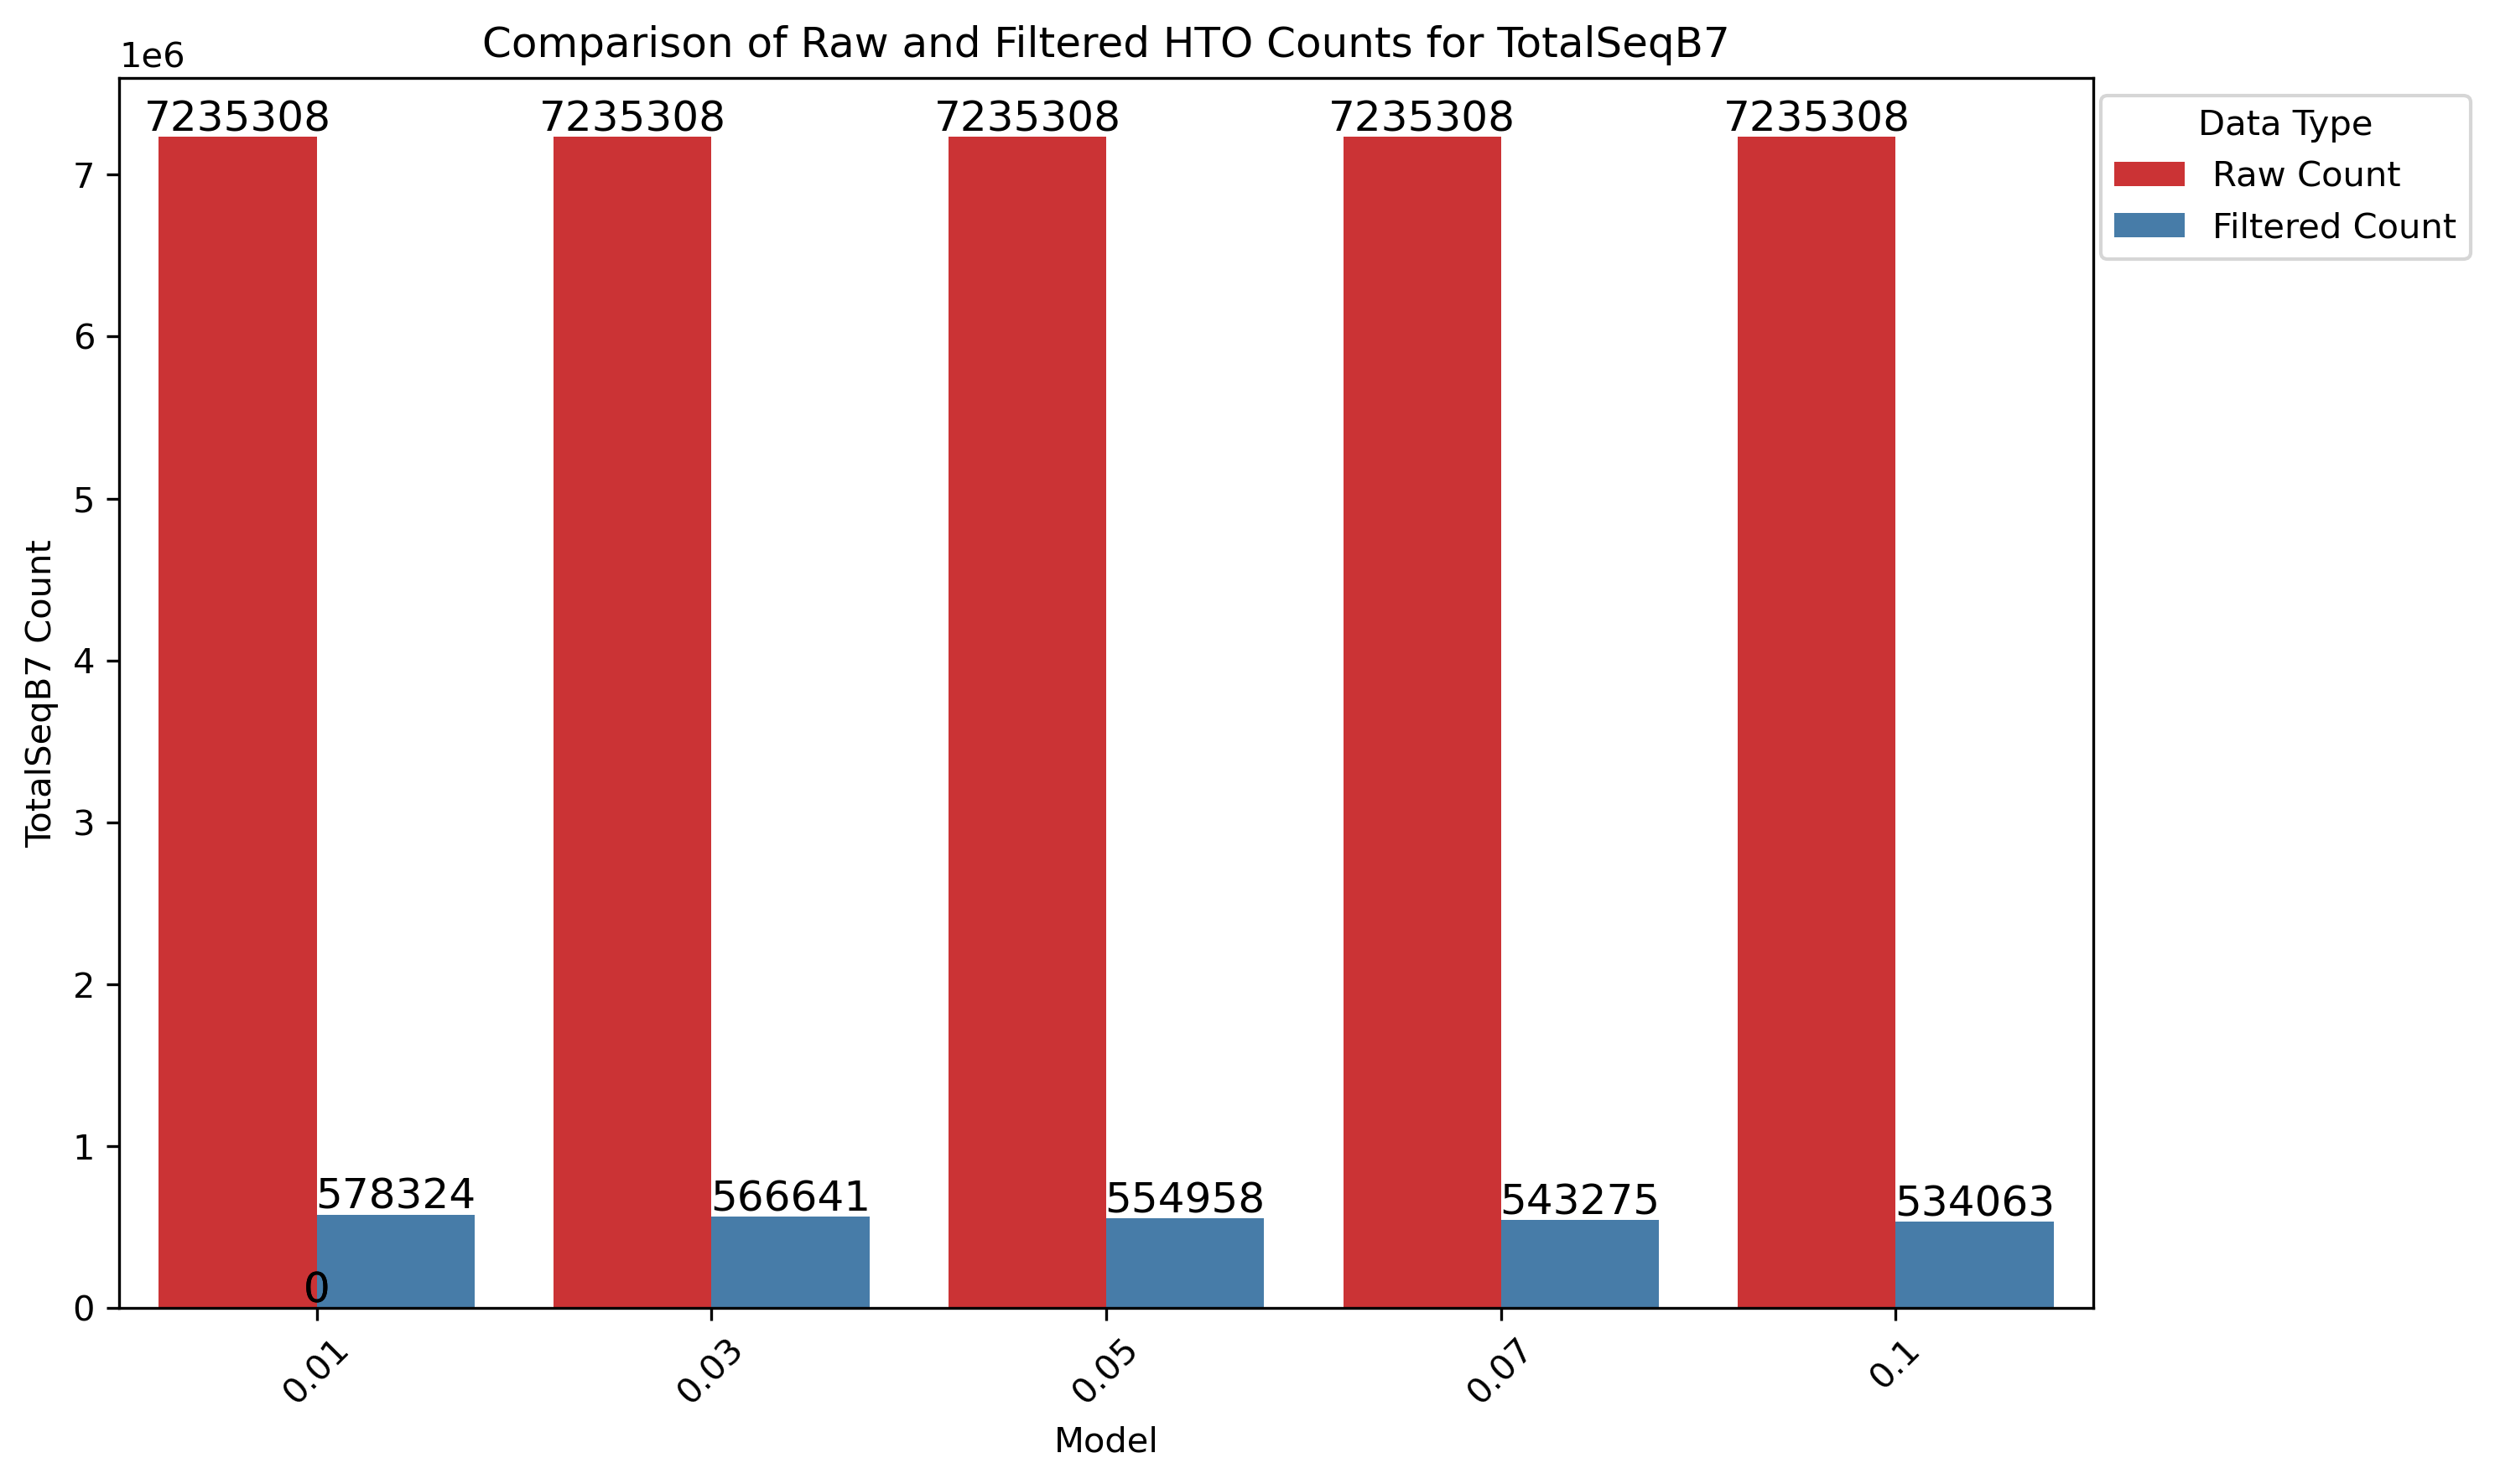

/tmp/ipykernel_228169/2534610132.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Model', y='HTO Count', hue='Count Type', data=hashtag_data, palette='Set1', ci=None)


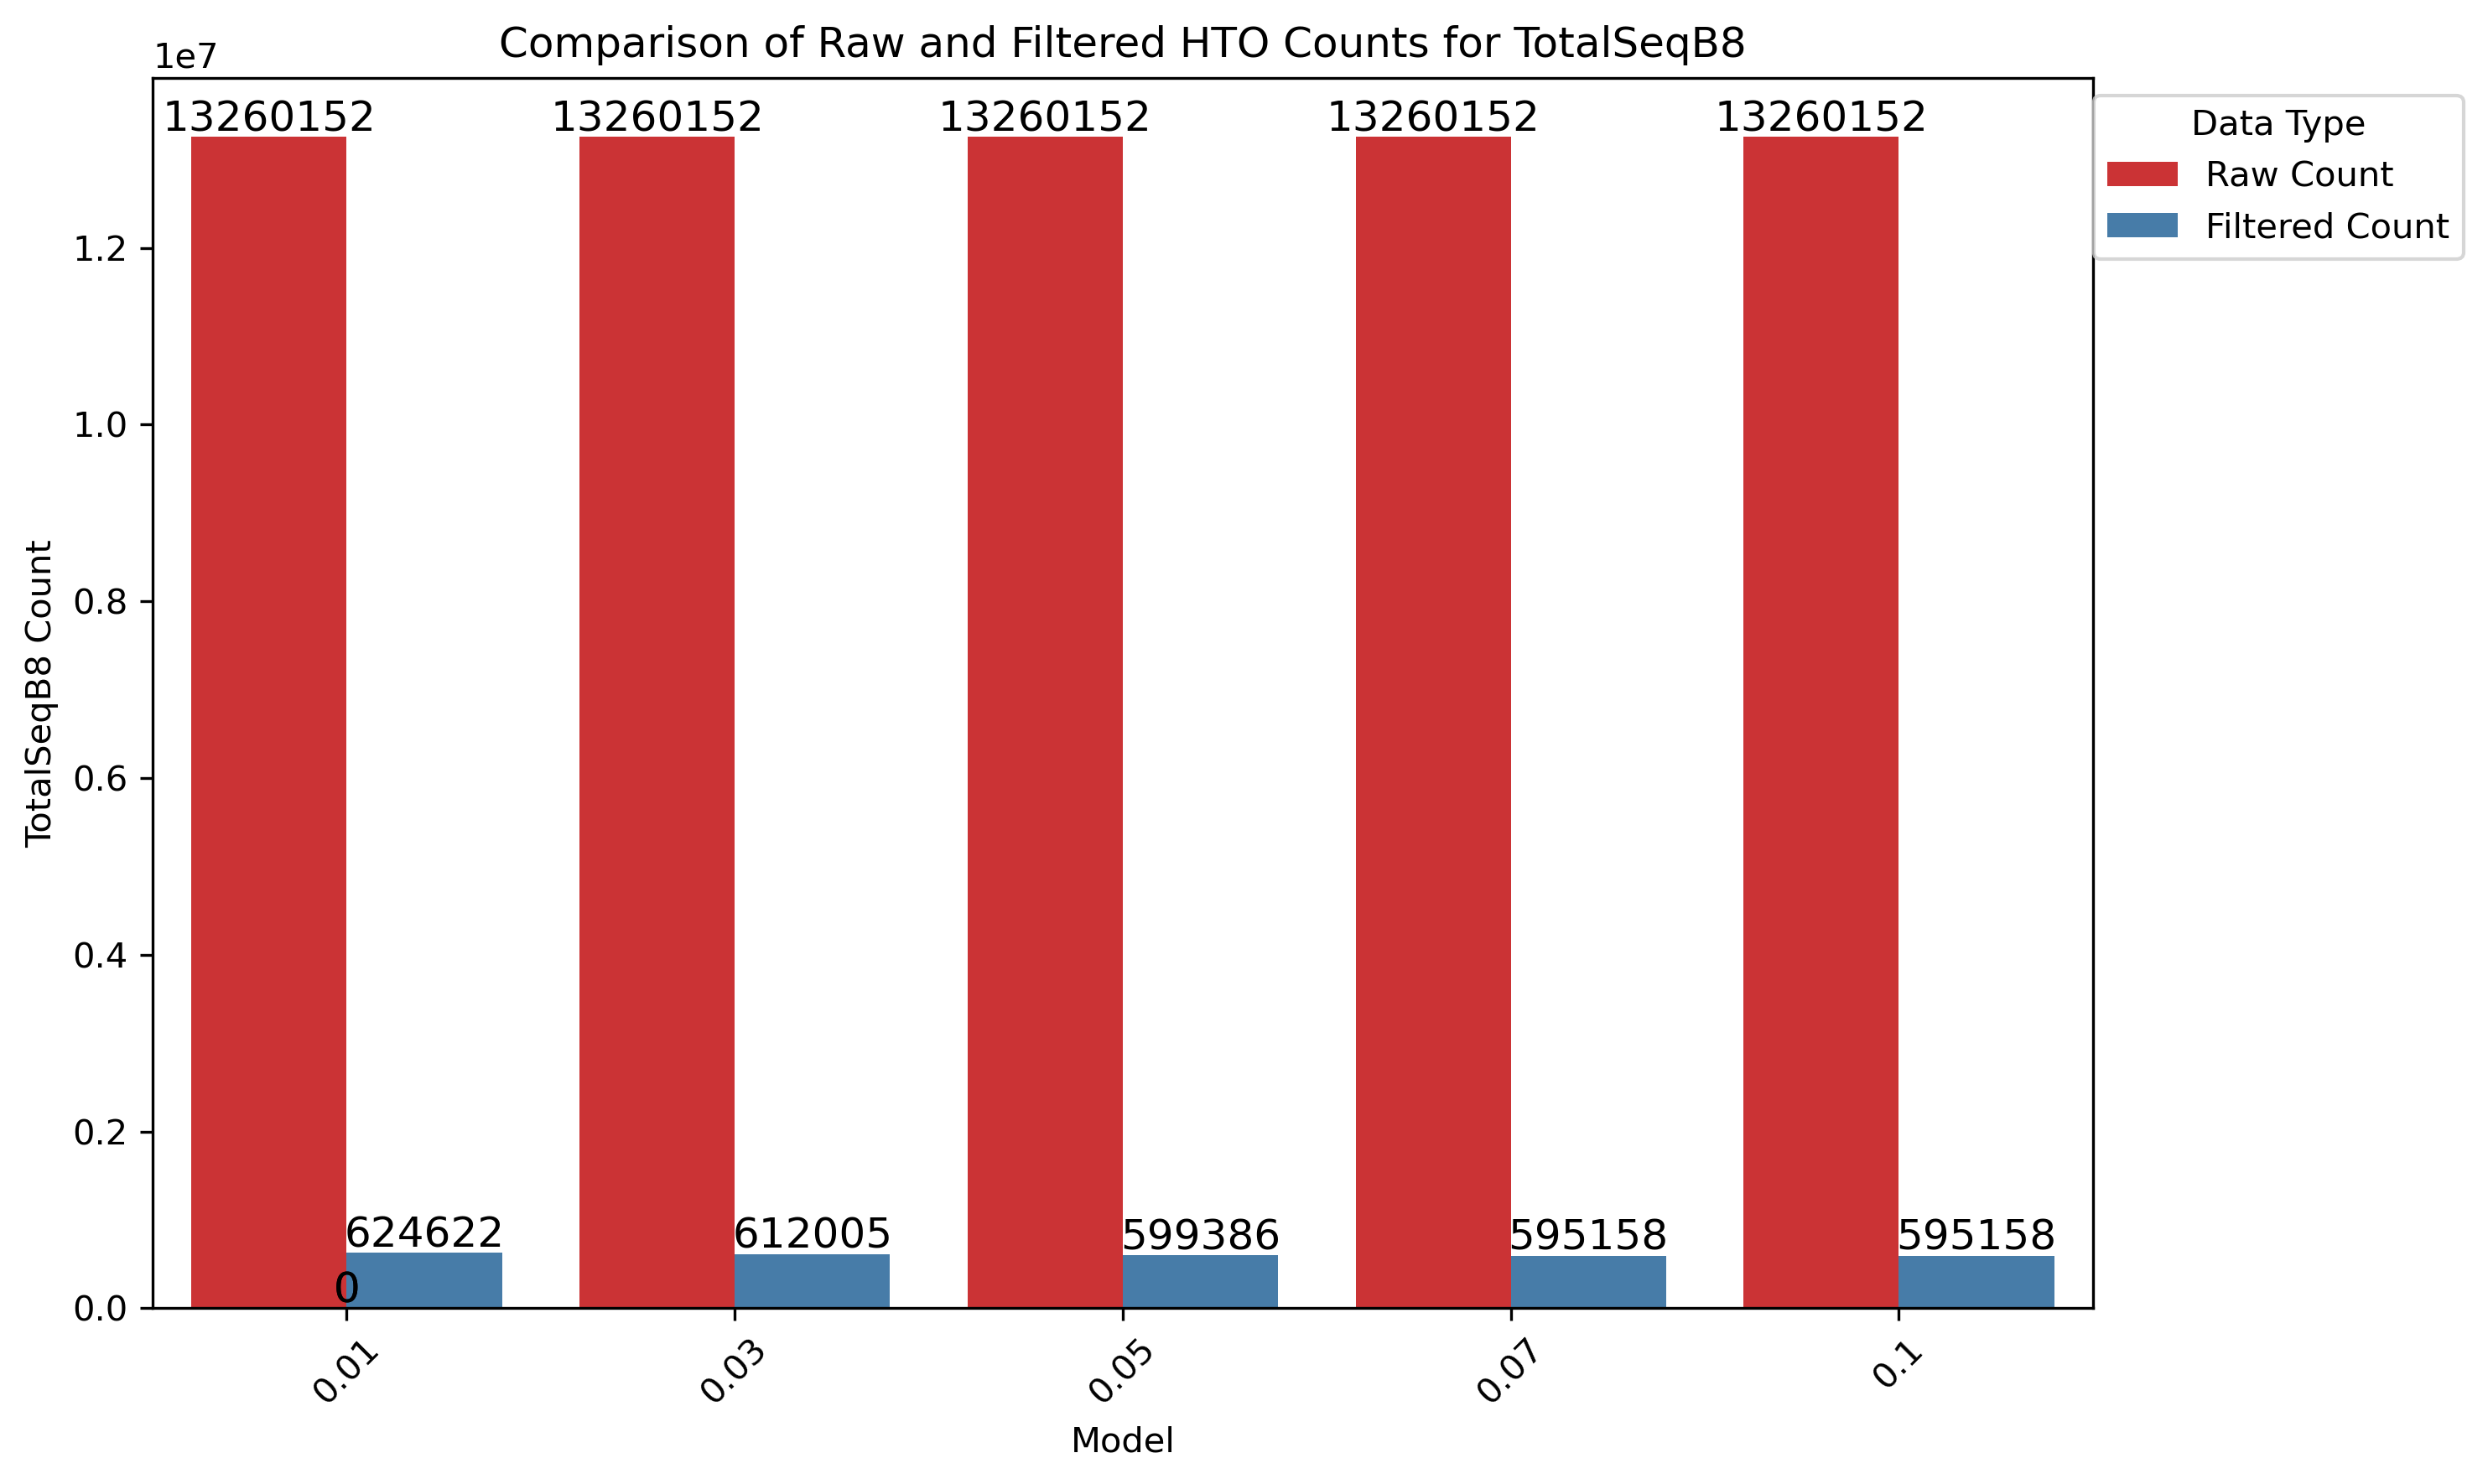

/tmp/ipykernel_228169/2534610132.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Model', y='HTO Count', hue='Count Type', data=hashtag_data, palette='Set1', ci=None)


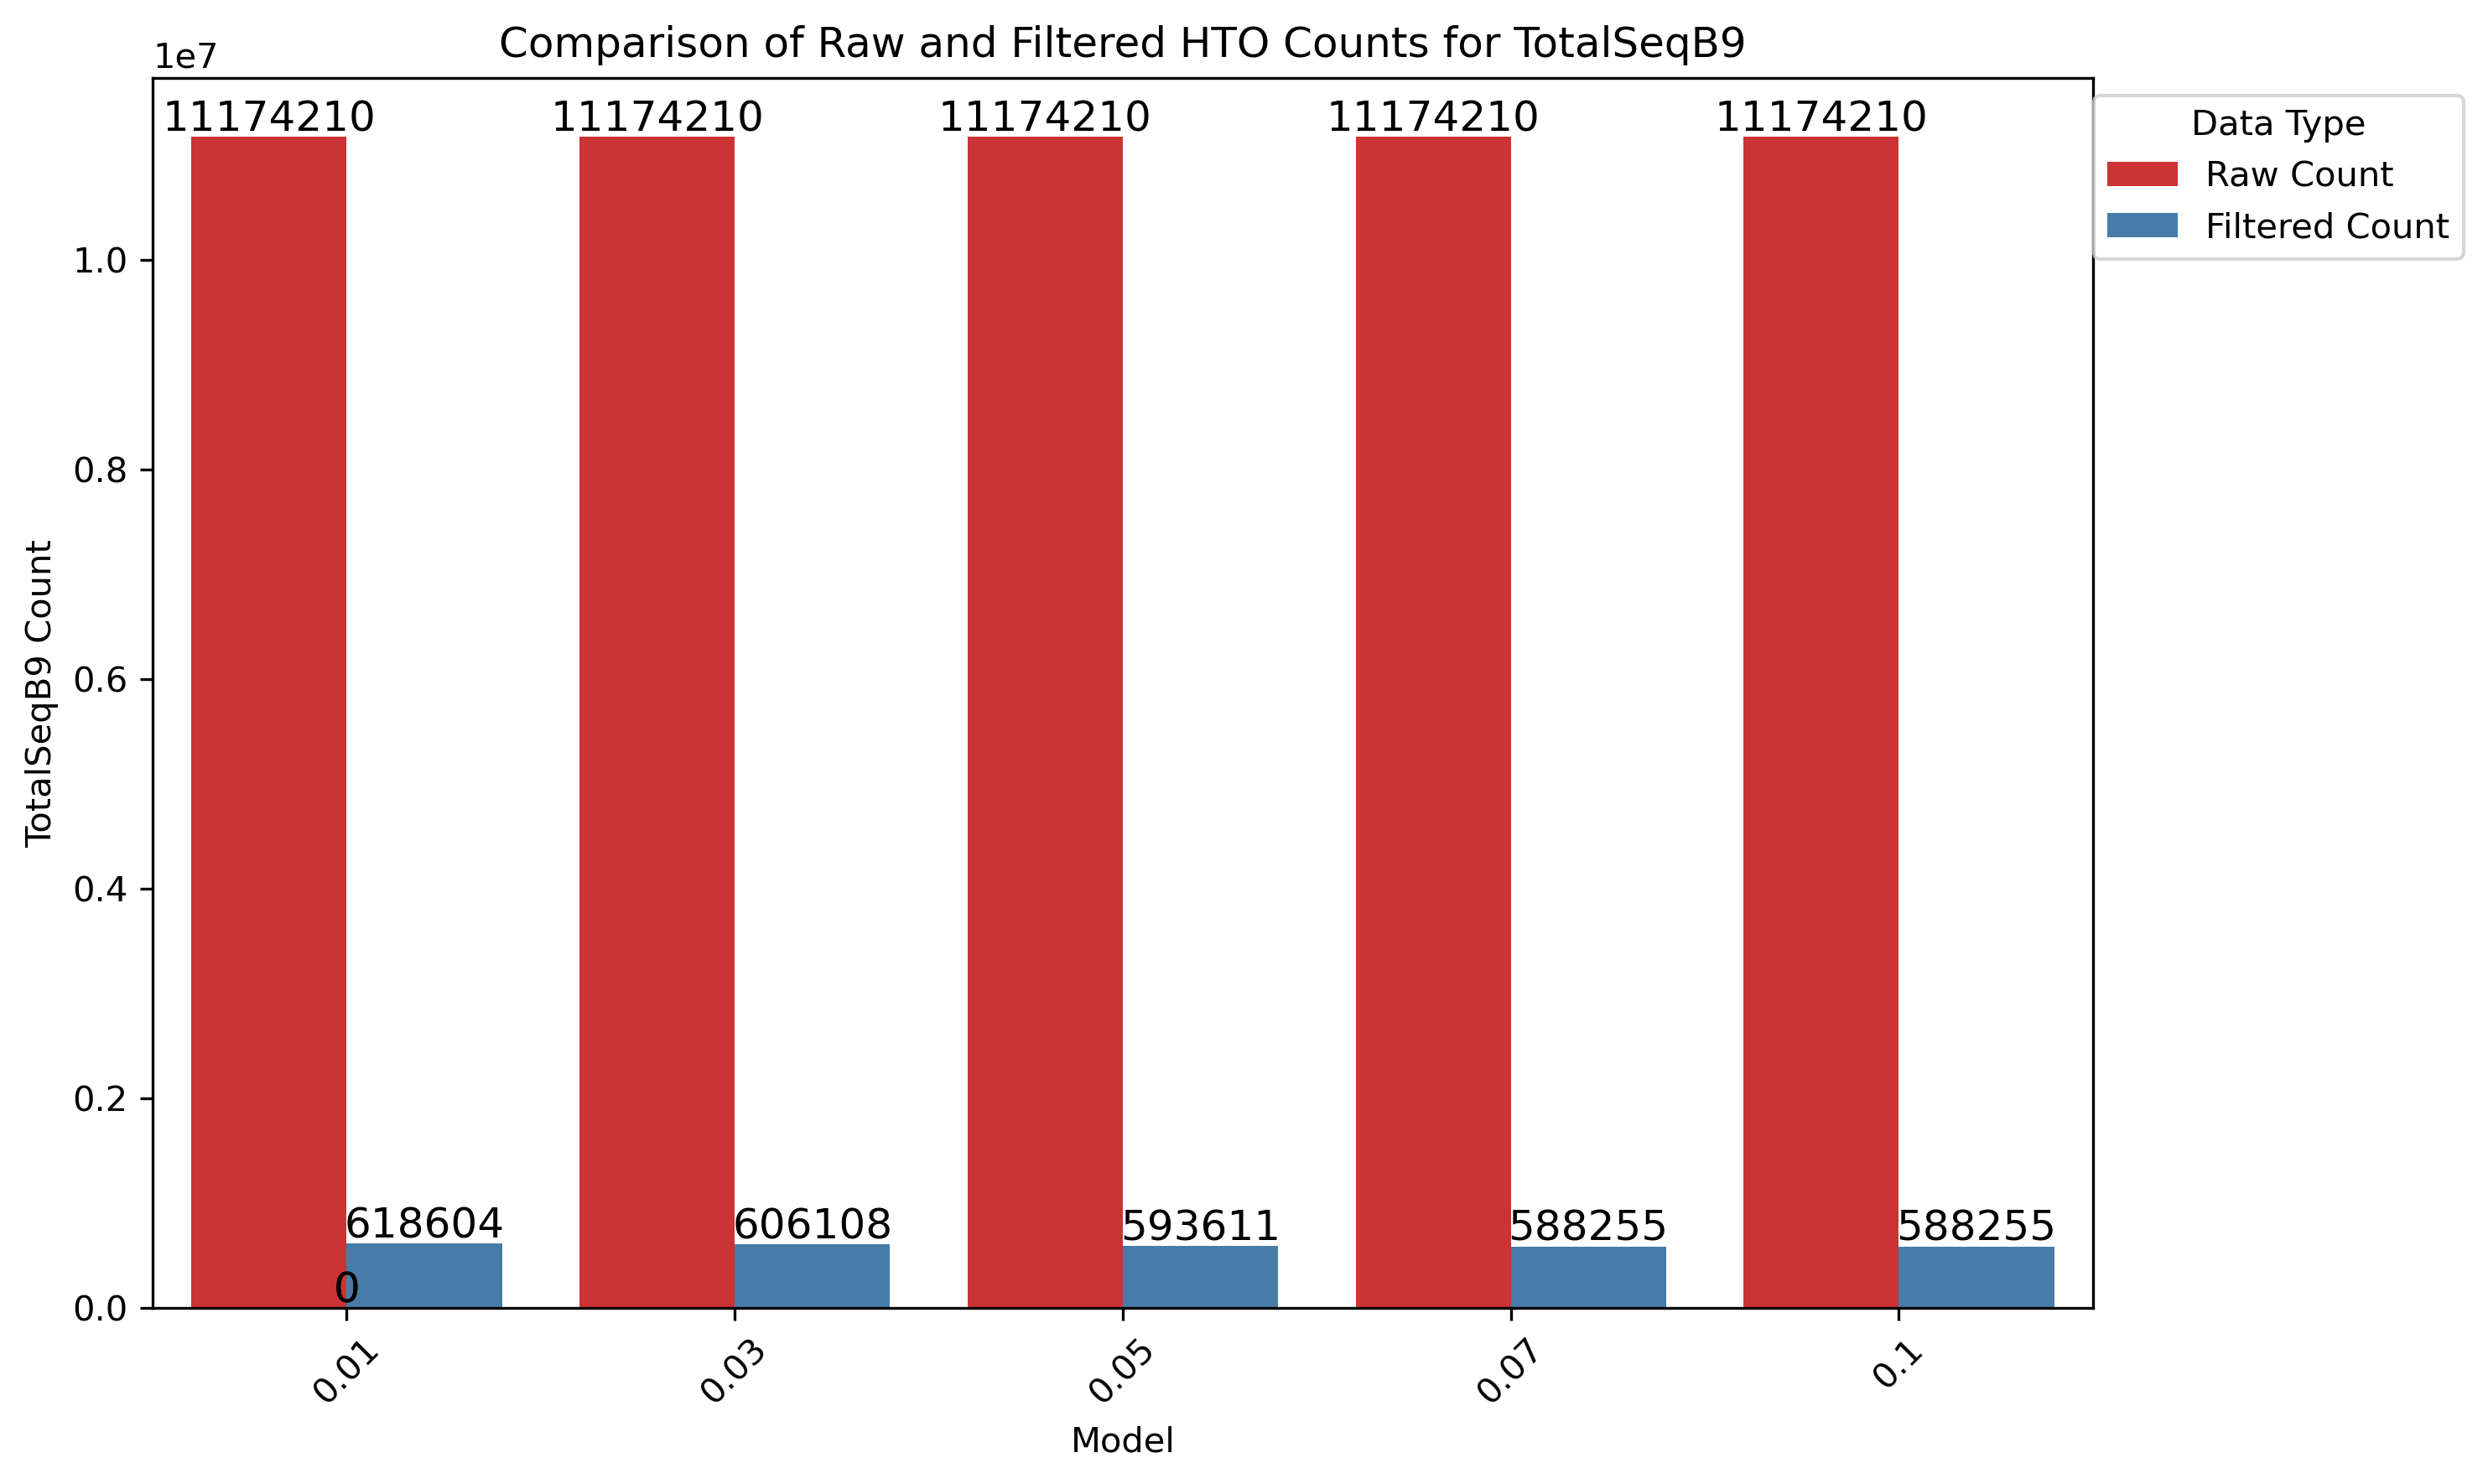

In [75]:
for hashtag in hto_counts_long['Hashtag'].unique():

    hashtag_data = hto_counts_long[hto_counts_long['Hashtag'] == hashtag]

    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(x='Model', y='HTO Count', hue='Count Type', data=hashtag_data, palette='Set1', ci=None)
    
    plt.title(f'Comparison of Raw and Filtered HTO Counts for {hashtag}')
    plt.xlabel('Model')
    plt.ylabel(f'{hashtag} Count')
    plt.xticks(rotation=45)
    plt.legend(title='Data Type', loc='upper right', bbox_to_anchor=(1.2, 1))
  
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()